In [1]:
import numpy as np
import torch
import torchvision

torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name(0))

import data, models, train, measurements
import optimizer as opt

NVIDIA GeForce RTX 3090


C:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data = data.load_reg_mnist()
test_data = data.load_reg_mnist(test=True)

model = models.fully_connected_net(28 * 28, 1, [400, 400], 'relu').cuda()
loss_fn = torch.nn.MSELoss()
torch.save({'model_state_dict': model.state_dict()}, './temp/model_init')

output = model(train_data[0].cuda())
print(output)
print(train_data[1].cuda())
print(loss_fn(output, train_data[1].cuda()))

tensor([[-0.0028],
        [-0.0275],
        [ 0.0011],
        ...,
        [-0.0177],
        [-0.0097],
        [-0.0168]], device='cuda:0', grad_fn=<MmBackward0>)
tensor([[ 0.4505],
        [-1.6227],
        [-0.9711],
        ...,
        [-1.5593],
        [-1.0308],
        [-1.1432]], device='cuda:0')
tensor(0.9880, device='cuda:0', grad_fn=<MseLossBackward0>)


In [3]:
lr = 0.1
mom = 0.
batch_size = 5000
phys_bs = 5000
num_epochs = 500

msrs = measurements.Measurement(verbose=True)
msrs.add_train_recorder('MSE', phys_bs, verbose=True)
msrs.add_train_recorder('MSE Sharpness', phys_bs, verbose=True)
msrs.add_train_recorder('Hessian Second Order Term Norm', phys_bs, verbose=True)
msrs.add_test_recorder('MSE', phys_bs, verbose=True)

optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=mom)

In [4]:
model.load_state_dict(torch.load('./temp/model_init')['model_state_dict'])
train.train(train_data, test_data, model, loss_fn, optimizer, batch_size, num_epochs, msrs)

Epoch #0
  Metrics on training data:
    MSE: 0.48578718304634094.
    MSE Sharpness: 4.074372291564941.
    Hessian Second Order Term Norm: 0.3824331760406494.
  Metrics on testing data:
    MSE: 0.485077828168869.
Epoch #1
  Metrics on training data:
    MSE: 0.47767165303230286.
    MSE Sharpness: 4.291589736938477.


C:\Python310\lib\site-packages\torch\autograd\__init__.py:173: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at  ..\torch\csrc\autograd\engine.cpp:1000.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


    Hessian Second Order Term Norm: -0.6741401553153992.
  Metrics on testing data:
    MSE: 0.4764895737171173.
Epoch #2
  Metrics on training data:
    MSE: 0.46898630261421204.
    MSE Sharpness: 4.656955242156982.
    Hessian Second Order Term Norm: -0.6992116570472717.
  Metrics on testing data:
    MSE: 0.4673055410385132.
Epoch #3
  Metrics on training data:
    MSE: 0.4592514634132385.
    MSE Sharpness: 5.185992240905762.
    Hessian Second Order Term Norm: -0.4408954977989197.
  Metrics on testing data:
    MSE: 0.4570179581642151.
Epoch #4
  Metrics on training data:
    MSE: 0.4480040371417999.
    MSE Sharpness: 5.905413627624512.
    Hessian Second Order Term Norm: -0.7098021507263184.
  Metrics on testing data:
    MSE: 0.4451490044593811.
Epoch #5
  Metrics on training data:
    MSE: 0.4347955882549286.
    MSE Sharpness: 6.870264053344727.
    Hessian Second Order Term Norm: -0.7126232385635376.
  Metrics on testing data:
    MSE: 0.43122783303260803.
Epoch #6
  Metric

    Hessian Second Order Term Norm: -0.39157357811927795.
  Metrics on testing data:
    MSE: 0.207147017121315.
Epoch #40
  Metrics on training data:
    MSE: 0.21423038840293884.
    MSE Sharpness: 46.10443878173828.
    Hessian Second Order Term Norm: -0.2725445330142975.
  Metrics on testing data:
    MSE: 0.19634316861629486.
Epoch #41
  Metrics on training data:
    MSE: 0.20949549973011017.
    MSE Sharpness: 51.70534133911133.
    Hessian Second Order Term Norm: -0.7629685997962952.
  Metrics on testing data:
    MSE: 0.19142240285873413.
Epoch #42
  Metrics on training data:
    MSE: 0.26779720187187195.
    MSE Sharpness: 49.276004791259766.
    Hessian Second Order Term Norm: 1.966141939163208.
  Metrics on testing data:
    MSE: 0.24381200969219208.
Epoch #43
  Metrics on training data:
    MSE: 1.3431316614151.
    MSE Sharpness: 87.36752319335938.
    Hessian Second Order Term Norm: 13.400981903076172.
  Metrics on testing data:
    MSE: 1.276041030883789.
Epoch #44
  Met

    Hessian Second Order Term Norm: -0.33300650119781494.
  Metrics on testing data:
    MSE: 0.19308005273342133.
Epoch #78
  Metrics on training data:
    MSE: 0.1994282305240631.
    MSE Sharpness: 32.97301483154297.
    Hessian Second Order Term Norm: 0.25399890542030334.
  Metrics on testing data:
    MSE: 0.18340140581130981.
Epoch #79
  Metrics on training data:
    MSE: 0.1909048706293106.
    MSE Sharpness: 35.13331985473633.
    Hessian Second Order Term Norm: -0.2909761965274811.
  Metrics on testing data:
    MSE: 0.1748407483100891.
Epoch #80
  Metrics on training data:
    MSE: 0.1831815093755722.
    MSE Sharpness: 37.08507537841797.
    Hessian Second Order Term Norm: -0.2734830677509308.
  Metrics on testing data:
    MSE: 0.1671697050333023.
Epoch #81
  Metrics on training data:
    MSE: 0.1761193871498108.
    MSE Sharpness: 38.8397102355957.
    Hessian Second Order Term Norm: -0.2616563141345978.
  Metrics on testing data:
    MSE: 0.16018986701965332.
Epoch #82
  

    MSE: 0.15131263434886932.
Epoch #115
  Metrics on training data:
    MSE: 0.14561767876148224.
    MSE Sharpness: 17.89568519592285.
    Hessian Second Order Term Norm: -0.47536391019821167.
  Metrics on testing data:
    MSE: 0.13351212441921234.
Epoch #116
  Metrics on training data:
    MSE: 0.1324935406446457.
    MSE Sharpness: 20.44526481628418.
    Hessian Second Order Term Norm: -0.39259088039398193.
  Metrics on testing data:
    MSE: 0.12001629173755646.
Epoch #117
  Metrics on training data:
    MSE: 0.12248924374580383.
    MSE Sharpness: 22.62865447998047.
    Hessian Second Order Term Norm: -0.32513150572776794.
  Metrics on testing data:
    MSE: 0.10982520133256912.
Epoch #118
  Metrics on training data:
    MSE: 0.11474145203828812.
    MSE Sharpness: 24.43174934387207.
    Hessian Second Order Term Norm: -0.2795987129211426.
  Metrics on testing data:
    MSE: 0.10202603787183762.
Epoch #119
  Metrics on training data:
    MSE: 0.1085159182548523.
    MSE Sharpnes

    Hessian Second Order Term Norm: 0.37395623326301575.
  Metrics on testing data:
    MSE: 0.04097360000014305.
Epoch #153
  Metrics on training data:
    MSE: 0.05175226181745529.
    MSE Sharpness: 23.99921989440918.
    Hessian Second Order Term Norm: 0.3417677879333496.
  Metrics on testing data:
    MSE: 0.042845189571380615.
Epoch #154
  Metrics on training data:
    MSE: 0.05724363774061203.
    MSE Sharpness: 24.612648010253906.
    Hessian Second Order Term Norm: 0.7328893542289734.
  Metrics on testing data:
    MSE: 0.04874033108353615.
Epoch #155
  Metrics on training data:
    MSE: 0.07050754874944687.
    MSE Sharpness: 24.289758682250977.
    Hessian Second Order Term Norm: 0.9142700433731079.
  Metrics on testing data:
    MSE: 0.0613039955496788.
Epoch #156
  Metrics on training data:
    MSE: 0.0942978784441948.
    MSE Sharpness: 24.79737091064453.
    Hessian Second Order Term Norm: 1.5212101936340332.
  Metrics on testing data:
    MSE: 0.08574486523866653.
Epoch

    MSE Sharpness: 19.80464744567871.
    Hessian Second Order Term Norm: 0.48947152495384216.
  Metrics on testing data:
    MSE: 0.03341834247112274.
Epoch #191
  Metrics on training data:
    MSE: 0.03945758566260338.
    MSE Sharpness: 20.227510452270508.
    Hessian Second Order Term Norm: 0.47695010900497437.
  Metrics on testing data:
    MSE: 0.033095426857471466.
Epoch #192
  Metrics on training data:
    MSE: 0.03954879194498062.
    MSE Sharpness: 19.86258316040039.
    Hessian Second Order Term Norm: 0.5054518580436707.
  Metrics on testing data:
    MSE: 0.033580876886844635.
Epoch #193
  Metrics on training data:
    MSE: 0.03955579549074173.
    MSE Sharpness: 20.24359130859375.
    Hessian Second Order Term Norm: -0.504831850528717.
  Metrics on testing data:
    MSE: 0.03330488130450249.
Epoch #194
  Metrics on training data:
    MSE: 0.039645176380872726.
    MSE Sharpness: 19.88767433166504.
    Hessian Second Order Term Norm: -0.1439725011587143.
  Metrics on testin

    Hessian Second Order Term Norm: -0.03502010554075241.
  Metrics on testing data:
    MSE: 0.02542080543935299.
Epoch #228
  Metrics on training data:
    MSE: 0.029970455914735794.
    MSE Sharpness: 19.714157104492188.
    Hessian Second Order Term Norm: -0.39002686738967896.
  Metrics on testing data:
    MSE: 0.025487933307886124.
Epoch #229
  Metrics on training data:
    MSE: 0.029735058546066284.
    MSE Sharpness: 19.99375343322754.
    Hessian Second Order Term Norm: -0.22230538725852966.
  Metrics on testing data:
    MSE: 0.025072835385799408.
Epoch #230
  Metrics on training data:
    MSE: 0.02955874241888523.
    MSE Sharpness: 19.716665267944336.
    Hessian Second Order Term Norm: 0.4671894311904907.
  Metrics on testing data:
    MSE: 0.025142431259155273.
Epoch #231
  Metrics on training data:
    MSE: 0.02932610921561718.
    MSE Sharpness: 19.978364944458008.
    Hessian Second Order Term Norm: -0.4577125608921051.
  Metrics on testing data:
    MSE: 0.02473414503

    Hessian Second Order Term Norm: 0.18304431438446045.
  Metrics on testing data:
    MSE: 0.020507430657744408.
Epoch #265
  Metrics on training data:
    MSE: 0.02378976158797741.
    MSE Sharpness: 19.904552459716797.
    Hessian Second Order Term Norm: 0.442840576171875.
  Metrics on testing data:
    MSE: 0.020227404311299324.
Epoch #266
  Metrics on training data:
    MSE: 0.023612789809703827.
    MSE Sharpness: 19.777587890625.
    Hessian Second Order Term Norm: 0.4348715841770172.
  Metrics on testing data:
    MSE: 0.020263461396098137.
Epoch #267
  Metrics on training data:
    MSE: 0.023491280153393745.
    MSE Sharpness: 19.918378829956055.
    Hessian Second Order Term Norm: -0.41033709049224854.
  Metrics on testing data:
    MSE: 0.01998155377805233.
Epoch #268
  Metrics on training data:
    MSE: 0.023306310176849365.
    MSE Sharpness: 19.755481719970703.
    Hessian Second Order Term Norm: -0.4089038670063019.
  Metrics on testing data:
    MSE: 0.0200087949633598

    Hessian Second Order Term Norm: -0.3162812292575836.
  Metrics on testing data:
    MSE: 0.01713688299059868.
Epoch #302
  Metrics on training data:
    MSE: 0.019724830985069275.
    MSE Sharpness: 19.83692741394043.
    Hessian Second Order Term Norm: -0.1667422652244568.
  Metrics on testing data:
    MSE: 0.017207177355885506.
Epoch #303
  Metrics on training data:
    MSE: 0.01966981403529644.
    MSE Sharpness: 19.923681259155273.
    Hessian Second Order Term Norm: -0.3894488513469696.
  Metrics on testing data:
    MSE: 0.01696745678782463.
Epoch #304
  Metrics on training data:
    MSE: 0.01952574960887432.
    MSE Sharpness: 19.832801818847656.
    Hessian Second Order Term Norm: -0.3919011652469635.
  Metrics on testing data:
    MSE: 0.01704823039472103.
Epoch #305
  Metrics on training data:
    MSE: 0.019488351419568062.
    MSE Sharpness: 19.920528411865234.
    Hessian Second Order Term Norm: -0.38701027631759644.
  Metrics on testing data:
    MSE: 0.01682460308074

    Hessian Second Order Term Norm: -0.3461580276489258.
  Metrics on testing data:
    MSE: 0.015239275991916656.
Epoch #339
  Metrics on training data:
    MSE: 0.017064006999135017.
    MSE Sharpness: 19.972610473632812.
    Hessian Second Order Term Norm: 0.1956271380186081.
  Metrics on testing data:
    MSE: 0.014987841248512268.
Epoch #340
  Metrics on training data:
    MSE: 0.01696881279349327.
    MSE Sharpness: 19.82984161376953.
    Hessian Second Order Term Norm: 0.3799295723438263.
  Metrics on testing data:
    MSE: 0.015121230855584145.
Epoch #341
  Metrics on training data:
    MSE: 0.01691345125436783.
    MSE Sharpness: 19.955167770385742.
    Hessian Second Order Term Norm: 0.3400534391403198.
  Metrics on testing data:
    MSE: 0.014868645928800106.
Epoch #342
  Metrics on training data:
    MSE: 0.016820482909679413.
    MSE Sharpness: 19.82335090637207.
    Hessian Second Order Term Norm: 0.3515836000442505.
  Metrics on testing data:
    MSE: 0.01500370725989341

    Hessian Second Order Term Norm: -0.28541702032089233.
  Metrics on testing data:
    MSE: 0.013449413701891899.
Epoch #376
  Metrics on training data:
    MSE: 0.014951188117265701.
    MSE Sharpness: 19.861412048339844.
    Hessian Second Order Term Norm: -0.1579124629497528.
  Metrics on testing data:
    MSE: 0.013626854866743088.
Epoch #377
  Metrics on training data:
    MSE: 0.014912626706063747.
    MSE Sharpness: 19.979049682617188.
    Hessian Second Order Term Norm: 0.36063602566719055.
  Metrics on testing data:
    MSE: 0.013383624143898487.
Epoch #378
  Metrics on training data:
    MSE: 0.014850208535790443.
    MSE Sharpness: 19.85386085510254.
    Hessian Second Order Term Norm: -0.28566792607307434.
  Metrics on testing data:
    MSE: 0.013552749529480934.
Epoch #379
  Metrics on training data:
    MSE: 0.014807354658842087.
    MSE Sharpness: 19.96961212158203.
    Hessian Second Order Term Norm: 0.1834915429353714.
  Metrics on testing data:
    MSE: 0.0133043639

    MSE Sharpness: 19.866647720336914.
    Hessian Second Order Term Norm: -0.3397899568080902.
  Metrics on testing data:
    MSE: 0.012282871641218662.
Epoch #413
  Metrics on training data:
    MSE: 0.013139024376869202.
    MSE Sharpness: 19.994251251220703.
    Hessian Second Order Term Norm: -0.15328216552734375.
  Metrics on testing data:
    MSE: 0.012045846320688725.
Epoch #414
  Metrics on training data:
    MSE: 0.013102451339364052.
    MSE Sharpness: 19.85647201538086.
    Hessian Second Order Term Norm: 0.10442136228084564.
  Metrics on testing data:
    MSE: 0.012234204448759556.
Epoch #415
  Metrics on training data:
    MSE: 0.013071835041046143.
    MSE Sharpness: 19.981021881103516.
    Hessian Second Order Term Norm: 0.32497507333755493.
  Metrics on testing data:
    MSE: 0.012000681832432747.
Epoch #416
  Metrics on training data:
    MSE: 0.013032261282205582.
    MSE Sharpness: 19.859935760498047.
    Hessian Second Order Term Norm: -0.270136296749115.
  Metrics

    Hessian Second Order Term Norm: -0.3320541977882385.
  Metrics on testing data:
    MSE: 0.011267289519309998.
Epoch #451
  Metrics on training data:
    MSE: 0.011753644794225693.
    MSE Sharpness: 20.00213623046875.
    Hessian Second Order Term Norm: -0.23766136169433594.
  Metrics on testing data:
    MSE: 0.01104688923805952.
Epoch #452
  Metrics on training data:
    MSE: 0.011721312999725342.
    MSE Sharpness: 19.87899398803711.
    Hessian Second Order Term Norm: -0.27697595953941345.
  Metrics on testing data:
    MSE: 0.011234836652874947.
Epoch #453
  Metrics on training data:
    MSE: 0.011705808341503143.
    MSE Sharpness: 20.0148983001709.
    Hessian Second Order Term Norm: 0.2714352607727051.
  Metrics on testing data:
    MSE: 0.011017613112926483.
Epoch #454
  Metrics on training data:
    MSE: 0.011671668849885464.
    MSE Sharpness: 19.887378692626953.
    Hessian Second Order Term Norm: 0.3269357979297638.
  Metrics on testing data:
    MSE: 0.01120390463620

    Hessian Second Order Term Norm: -0.2832467257976532.
  Metrics on testing data:
    MSE: 0.010252099484205246.
Epoch #488
  Metrics on training data:
    MSE: 0.010642067529261112.
    MSE Sharpness: 19.900455474853516.
    Hessian Second Order Term Norm: -0.05386926978826523.
  Metrics on testing data:
    MSE: 0.010460681281983852.
Epoch #489
  Metrics on training data:
    MSE: 0.010609855875372887.
    MSE Sharpness: 20.02878761291504.
    Hessian Second Order Term Norm: 0.32185783982276917.
  Metrics on testing data:
    MSE: 0.010230636224150658.
Epoch #490
  Metrics on training data:
    MSE: 0.010597019456326962.
    MSE Sharpness: 19.8995304107666.
    Hessian Second Order Term Norm: 0.08305806666612625.
  Metrics on testing data:
    MSE: 0.010431437753140926.
Epoch #491
  Metrics on training data:
    MSE: 0.010565715841948986.
    MSE Sharpness: 20.029916763305664.
    Hessian Second Order Term Norm: 0.32319343090057373.
  Metrics on testing data:
    MSE: 0.01020234171

In [7]:
from matplotlib import pyplot as plt

for rec in msrs.get_train_recorder():
    if rec.get_name() == 'MSE':
        MSE_hist = rec.get_records()
    if rec.get_name() == 'MSE Sharpness':
        MSE_sharp = rec.get_records()
    if rec.get_name() == 'Hessian Second Order Term Norm':
        h_hat_sharp = rec.get_records()

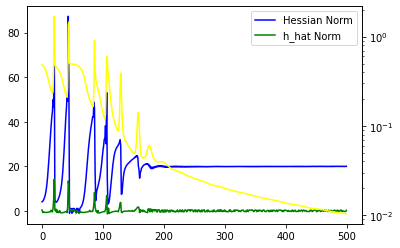

In [19]:
x = [x for x, y in MSE_hist]
MSEs = [y for x, y in MSE_hist]
sharps = [y for x, y in MSE_sharp]
h_hats = [y for x, y in h_hat_sharp]

_, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.plot(x, MSEs, label='MSE', color='yellow')
ax1.plot(x, sharps, label='Hessian Norm', color='blue')
ax1.plot(x, h_hats, label='h_hat Norm', color='green')
ax2.set_yscale('log')
ax1.legend()
plt.savefig('HessianNormCmp.png')